<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## Análise de preços de imóveis na cidade do Rio de Janeiro


In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Ahmad Kheder, 20.01323-0' #@param {type:"string"}
Aluno2 = 'Caio Bartolozzi Bastos Godoy de Toledo, 20.01430-9' #@param {type:"string"}
Aluno3 = 'Davi Fernandes Simões Soares, 20.01099-0' #@param {type:"string"}
Aluno4 = 'Lucas Romanato, 20.00313-7' #@param {type:"string"}
Aluno5 = 'Leonardo Campos, 20.00786-8' #@param {type:"string"}

# **Resumo (*Abstract*)**

Este datafolio analisa o mercado do Airbnb no Rio de Janeiro, destacando preços, qualidade, e tendências sazonais. Estudamos variações regionais de preços, influência da localização na qualidade das acomodações, sazonalidade dos preços e disponibilidade, características dos superhosts, e diferenças de pontuações entre hosts estrangeiros e brasileiros. Os resultados oferecem insights valiosos para hosts e hóspedes, auxiliando na otimização de anúncios e escolha de acomodações.

# **Introdução**

Plataformas como o Airbnb se tornaram populares para acomodações de curta duração, oferecendo aos viajantes uma alternativa aos hotéis tradicionais. Elas oferecem uma grande variedade de acomodações, desde apartamentos e casas até quartos individuais geralmente com preços mais acessíveis do que hotéis, especialmente em cidades turísticas populares. Além disso, Os hóspedes têm mais autonomia e mais privacidade do que  em de hotéis.

Este estudo de Análise Exploratória de Dados (EDA) foca no mercado de Airbnb na cidade do Rio de Janeiro, uma das cidades mais visitadas do Brasil, com o objetivo de verificar padrões sazonais, comparar características de diferentes tipos de anfitriões e explorar a influência de fatores como localização sobre as avaliações e preços.

Ao longo desta análise, são aplicadas diversas ferramentas de manipulação e visualização de dados, como Pandas, Matplotlib e Seaborn. Por meio de técnicas estatísticas e visualizações de dados, espera-se entender melhor o mercado de aluguel de curto prazo no Rio de Janeiro  e fatores que afetam o desempenho e preço dos imóveis, fornecendo informações valiosas tanto para anfitriões quanto para hóspedes.


# **Descrição e origem dos dados**

Dataset do AirBnB da cidade do Rio de Janeiro

- "listings.csv" (gz) - Dados detalhados de listagens

- "listings.csv" -







###Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extração dos dados

In [ ]:
url_listings = "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/data/listings.csv.gz"
df_listings = pd.read_csv(url_listings, compression="gzip")

url_calendar = "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/data/calendar.csv.gz"
df_calendar = pd.read_csv(url_calendar, compression="gzip")

# **Aquisição e Preparação dos dados**










In [ ]:
# seu código
def price_to_float(price):
  if type(price) == str:
    return float(price.replace("$", "").replace(",", ""))
  else:
    return price

def calculate_score_zone(property):
    return df_hosts_local_with_reviews.groupby("zone")[property].mean().reset_index()

def add_value_labels(ax, padding=3):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=padding)

def calculate_score_superhost(prop):
    return df_listings.groupby("host_is_superhost")[prop].mean().reset_index()

df_listings.price = df_listings.price.apply(price_to_float)

# Dicionário com todos os bairros por zona do Rio de Janeiro
zones_rj = {
    "Zona Norte": ["Abolição", "Água Santa", "Alto da Boa Vista", "Anchieta", "Bancários", "Barros Filho", "Benfica", "Bonsucesso", "Braz de Pina", "Cachambi", "Cacuia", "Campinho", "Cascadura", "Catumbi", "Cidade Universitária", "Cocotá", "Complexo do Alemão", "Cordovil", "Costa Barros", "Del Castilho", "Engenho da Rainha", "Engenho de Dentro", "Engenho Novo", "Galeão", "Grajaú", "Higienópolis", "Honório Gurgel", "Inhaúma", "Irajá", "Jacaré", "Jacarezinho", "Jardim América", "Jardim Carioca", "Jardim Guanabara", "Lins de Vasconcelos", "Madureira", "Manguinhos", "Marechal Hermes", "Maria da Graça", "Méier", "Moneró", "Olaria", "Oswaldo Cruz", "Pavuna", "Penha", "Penha Circular", "Piedade", "Pilares", "Praia da Bandeira", "Quintino Bocaiúva", "Ramos", "Riachuelo", "Ribeira", "Rocha", "Rocha Miranda", "Sampaio", "São Cristóvão", "São Francisco Xavier", "Tauá", "Tomás Coelho", "Todos os Santos", "Vasco da Gama", "Vicente de Carvalho", "Vigário Geral", "Vila da Penha", "Vila Isabel", "Vila Kosmos", "Vista Alegre", "Andaraí", "Bento Ribeiro", "Brás de Pina", "Caju", "Cavalcanti", "Coelho Neto", "Colégio", "Encantado", "Engenheiro Leal", "Guadalupe", "Inhoaíba", "Mangueira", "Maracanã", "Maré", "Osvaldo Cruz", "Padre Miguel", "Parada de Lucas", "Parque Anchieta", "Pitangueiras", "Portuguesa", "Praça Seca", "Praça da Bandeira", "Realengo", "Ricardo de Albuquerque", "Rocinha", "Santa Teresa", "Senador Vasconcelos", "Tijuca", "Turiaçú", "Vaz Lobo", "Vidigal", "Vila Militar", "Zumbi", "Acari"],
    "Zona Sul": ["Botafogo", "Catete", "Copacabana", "Cosme Velho", "Flamengo", "Gávea", "Glória", "Humaitá", "Ipanema", "Jardim Botânico", "Lagoa", "Laranjeiras", "Leblon", "Leme", "Praia de Botafogo", "Urca", "São Conrado"],
    "Zona Oeste": ["Anil", "Barra da Tijuca", "Campo Grande", "Cidade de Deus", "Curicica", "Freguesia", "Gardênia Azul", "Grumari", "Guaratiba", "Itanhangá", "Jacarepaguá", "Jardim Sulacap", "Joá", "Magalhães Bastos", "Paciência", "Pechincha", "Recreio dos Bandeirantes", "Restinga", "Rio das Pedras", "Santa Cruz", "Santíssimo", "Senador Camará", "Sepetiba", "Taquara", "Tanque", "Vargem Grande", "Vargem Pequena", "Vila Valqueire", "Bangu", "Barra de Guaratiba", "Camorim", "Cosmos", "Gericinó", "Freguesia (Jacarepaguá)", "Pedra de Guaratiba"],
    "Zona Centro": ["Centro", "Cidade Nova", "Estácio", "Gamboa", "Paquetá", "Rio Comprido", "Santo Cristo", "Saúde", "Deodoro", "Freguesia (Ilha)"]
}

# Aplicando a zona aos bairros do DataFrame
neighbourhood_zone = {}
for zone, neighbourhoods in zones_rj.items():
    for neighbourhood in neighbourhoods:
        neighbourhood_zone[neighbourhood] = zone

df_listings['zone'] = df_listings['neighbourhood_cleansed'].map(neighbourhood_zone)

# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

## **Q1. Pergunta 1.** Qual é o preço médio por noite de um imóvel no Airbnb no Rio de Janeiro por região?

<ipython-input-5-751d16090ccd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="zone", y="price", data=df_zone_mean, palette="viridis")


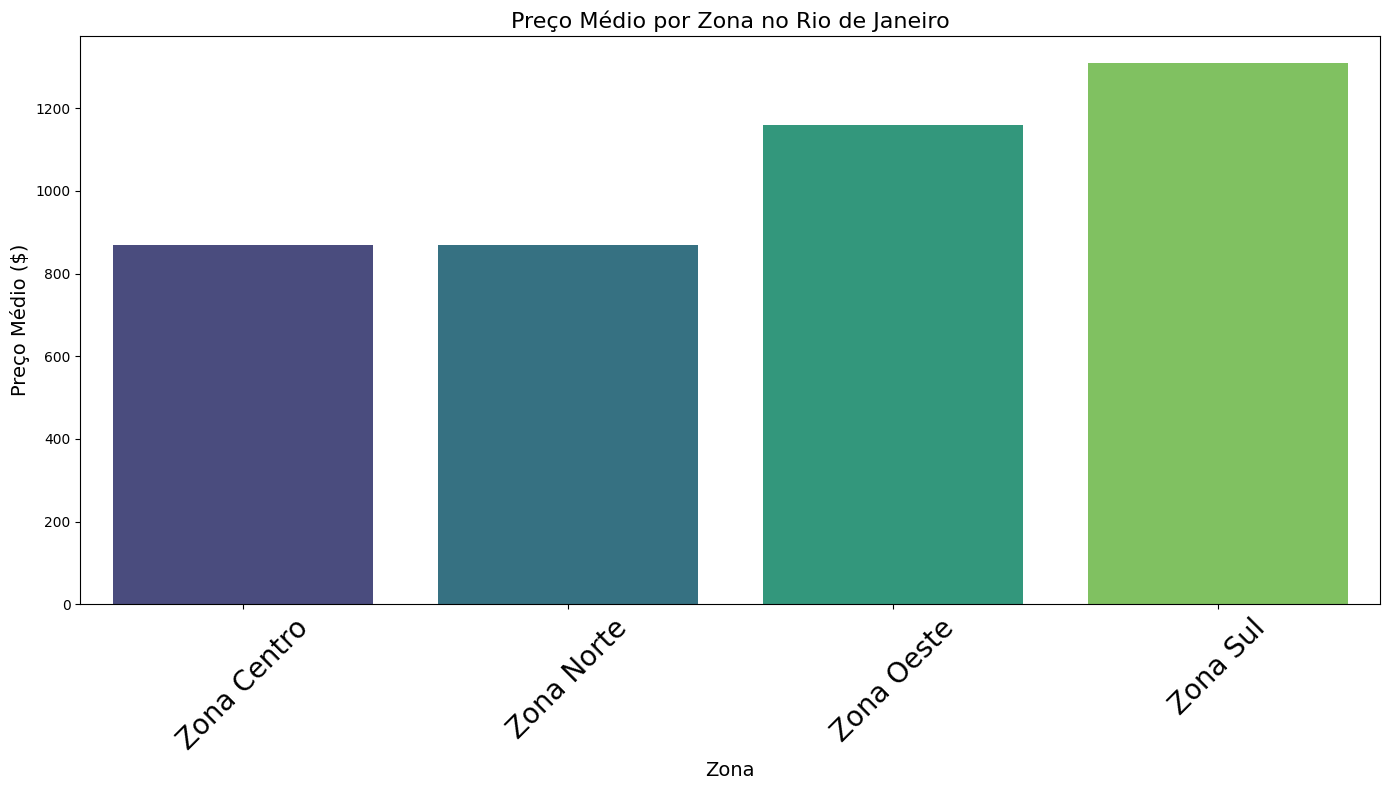

In [ ]:
# Agrupando por zona
df_zone_mean = df_listings.groupby("zone").price.mean().reset_index()
df_zone_mean

# Plotando os dados
plt.figure(figsize=(14, 8))
sns.barplot(x="zone", y="price", data=df_zone_mean, palette="viridis")
plt.title("Preço Médio por Zona no Rio de Janeiro", fontsize=16)
plt.xlabel("Zona", fontsize=14)
plt.ylabel("Preço Médio ($)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusão Q1

O preço médio por região no Rio de Janeiro apresentou a Zona Sul com maior valor, ultrapassando R$1200/diária. Enquanto as zonas de menor custo ficam dividas entre a Zona Norte e Centro. Um motivo a que se deve essa discrepância seja por bairros mais nobres e seguros existentes na Zona Sul, tais como Leblon, Ipanema, Gávea, entre outros.

## **Q2. Pergunta 2.** Como a localização do imóvel influencia a qualidade das acomodações?

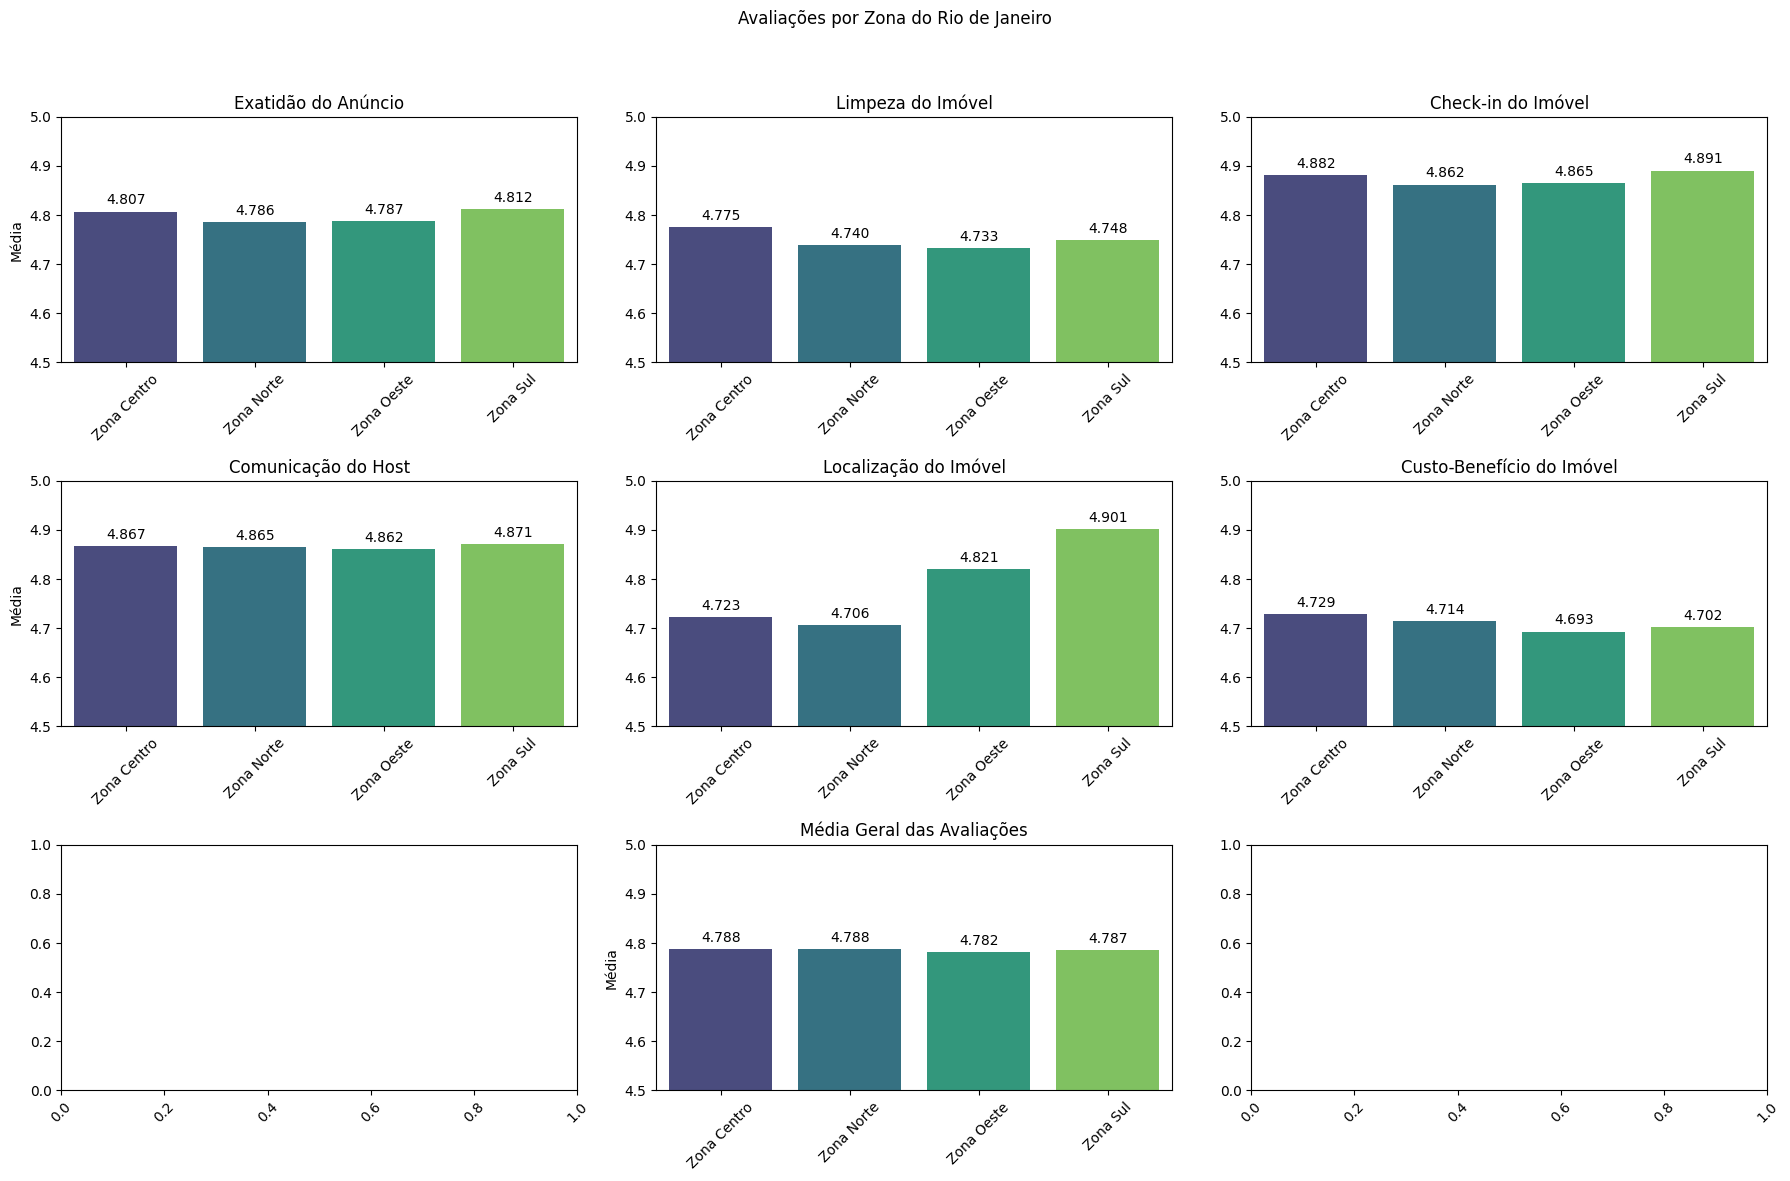

In [ ]:
# Selecionando dados pertinentes para esta análise entre a localização e qualidade julgada pelos usuários (avaliações)
df_hosts_local_with_reviews = df_listings[["neighbourhood_cleansed", "zone", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
                                           "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]]

df_hosts_review_by_zone = df_hosts_local_with_reviews.groupby("zone")

# Avaliação da exatidão do anúncio por zona da cidade do Rio de Janeiro
df_host_local_accuracy = calculate_score_zone("review_scores_accuracy")

# Avaliação da limpeza do imóvel por zona
df_host_local_cleanliness = calculate_score_zone("review_scores_cleanliness")

# Avaliação do check-in do imóvel por zona
df_host_local_checkin = calculate_score_zone("review_scores_checkin")

# Avaliação da comunicação do host do imóvel por zona
df_host_local_communication = calculate_score_zone("review_scores_communication")

# Avaliação da localização do imóvel por zona
df_host_local_location = calculate_score_zone("review_scores_location")

# Avaliação do custo-benefício do imóvel por zona
df_host_local_scores_values = calculate_score_zone("review_scores_value")

# Média geral por zona, calculada pelo AirBnB em relação com os parâmetros avaliados e seus respectivos pesos
df_host_local_general_score = calculate_score_zone("review_scores_rating")

fig, ax = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Avaliações por Zona do Rio de Janeiro')

# Plotando os gráficos
sns.barplot(data=df_host_local_accuracy, x='zone', y='review_scores_accuracy', ax=ax[0, 0], hue='zone', palette='viridis', dodge=False)
ax[0, 0].set_title('Exatidão do Anúncio')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Média')
ax[0, 0].set_ylim(4.5, 5)
add_value_labels(ax[0, 0])

sns.barplot(data=df_host_local_cleanliness, x='zone', y='review_scores_cleanliness', ax=ax[0, 1], hue='zone', palette='viridis', dodge=False)
ax[0, 1].set_title('Limpeza do Imóvel')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')
ax[0, 1].set_ylim(4.5, 5)
add_value_labels(ax[0, 1])

sns.barplot(data=df_host_local_checkin, x='zone', y='review_scores_checkin', ax=ax[0, 2], hue='zone', palette='viridis', dodge=False)
ax[0, 2].set_title('Check-in do Imóvel')
ax[0, 2].set_xlabel('')
ax[0, 2].set_ylabel('')
ax[0, 2].set_ylim(4.5, 5)
add_value_labels(ax[0, 2])

sns.barplot(data=df_host_local_communication, x='zone', y='review_scores_communication', ax=ax[1, 0], hue='zone', palette='viridis', dodge=False)
ax[1, 0].set_title('Comunicação do Host')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Média')
ax[1, 0].set_ylim(4.5, 5)
add_value_labels(ax[1, 0])

sns.barplot(data=df_host_local_location, x='zone', y='review_scores_location', ax=ax[1, 1], hue='zone', palette='viridis', dodge=False)
ax[1, 1].set_title('Localização do Imóvel')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')
ax[1, 1].set_ylim(4.5, 5)
add_value_labels(ax[1, 1])

sns.barplot(data=df_host_local_scores_values, x='zone', y='review_scores_value', ax=ax[1, 2], hue='zone', palette='viridis', dodge=False)
ax[1, 2].set_title('Custo-Benefício do Imóvel')
ax[1, 2].set_xlabel('')
ax[1, 2].set_ylabel('')
ax[1, 2].set_ylim(4.5, 5)
add_value_labels(ax[1, 2])

sns.barplot(data=df_host_local_general_score, x='zone', y='review_scores_rating', ax=ax[2, 1], hue='zone', palette='viridis', dodge=False)
ax[2, 1].set_title('Média Geral das Avaliações')
ax[2, 1].set_xlabel('')
ax[2, 1].set_ylabel('Média')
ax[2, 1].set_ylim(4.5, 5)
add_value_labels(ax[2, 1])

for a in ax.flat:
    for label in a.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Conclusão Q2

As avaliações médias dos imóveis variam significativamente entre as diferentes zonas da cidade, com algumas áreas recebendo consistentemente avaliações superiores. Com destaque para a localização, onde a Zona Sul se destacou significamente em relação as demais regiões, e quando analisado todos os critérios isolando essa zona, é evidente que existem avaliações bem satisfatórias dos clientes, possivelmente indicando a localização como um fator importante a ser considerado na qualidade da acomodação.

## **Q3. Pergunta 3.** Qual é a sazonalidade dos preços dos imóveis no Airbnb no Rio de Janeiro?

Adicionando Zona no dataframe df_calendar

In [ ]:
df_listings_zone = df_listings[["id", "zone"]].copy()

df_calendar_with_zone = pd.merge(df_calendar, df_listings_zone, left_on='listing_id', right_on='id', how='left')

df_calendar['zone'] = df_calendar_with_zone['zone']

df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,zone
0,17878,2023-12-27,f,350.0,NaN,5.0,28.0,2023-12,Zona Sul
1,17878,2023-12-28,f,350.0,NaN,5.0,28.0,2023-12,Zona Sul
2,17878,2023-12-29,f,350.0,NaN,5.0,28.0,2023-12,Zona Sul
3,17878,2023-12-30,f,350.0,NaN,5.0,28.0,2023-12,Zona Sul
4,17878,2023-12-31,f,350.0,NaN,5.0,28.0,2023-12,Zona Sul


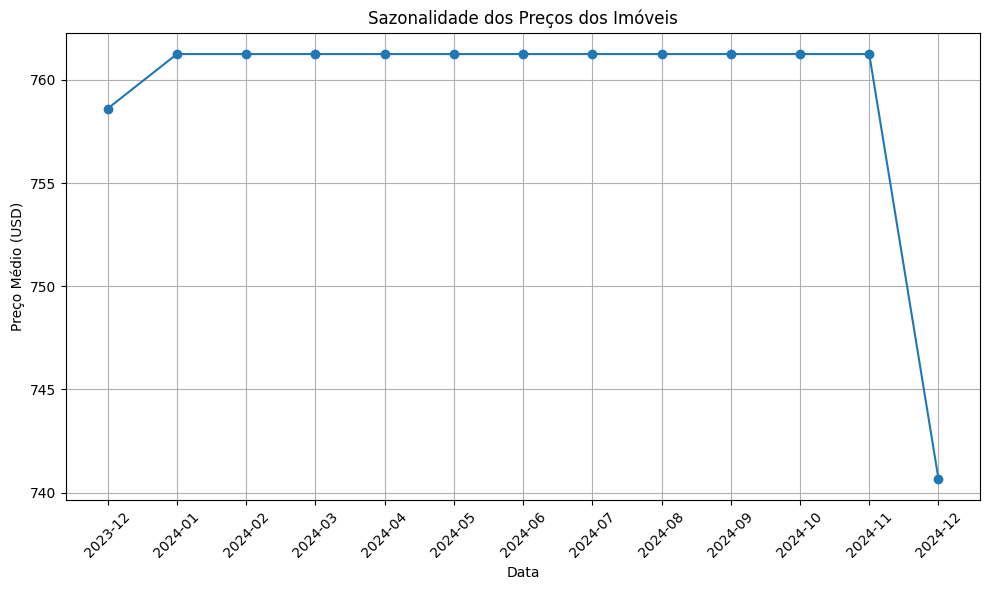

In [ ]:
df_seasonality_prices = df_calendar[["date", "price"]].copy()

df_seasonality_prices['price'] = df_seasonality_prices['price'].apply(price_to_float)
df_seasonality_prices['date'] = pd.to_datetime(df_seasonality_prices['date'])

df_seasonality_prices = df_seasonality_prices.groupby("date").mean().reset_index()

df_seasonality_prices['month'] = df_seasonality_prices['date'].dt.to_period('M')
monthly_prices = df_seasonality_prices.groupby('month')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_prices['month'].astype(str), monthly_prices['price'], marker='o')
plt.title('Sazonalidade dos Preços dos Imóveis')
plt.xlabel('Data')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

### Por zona:

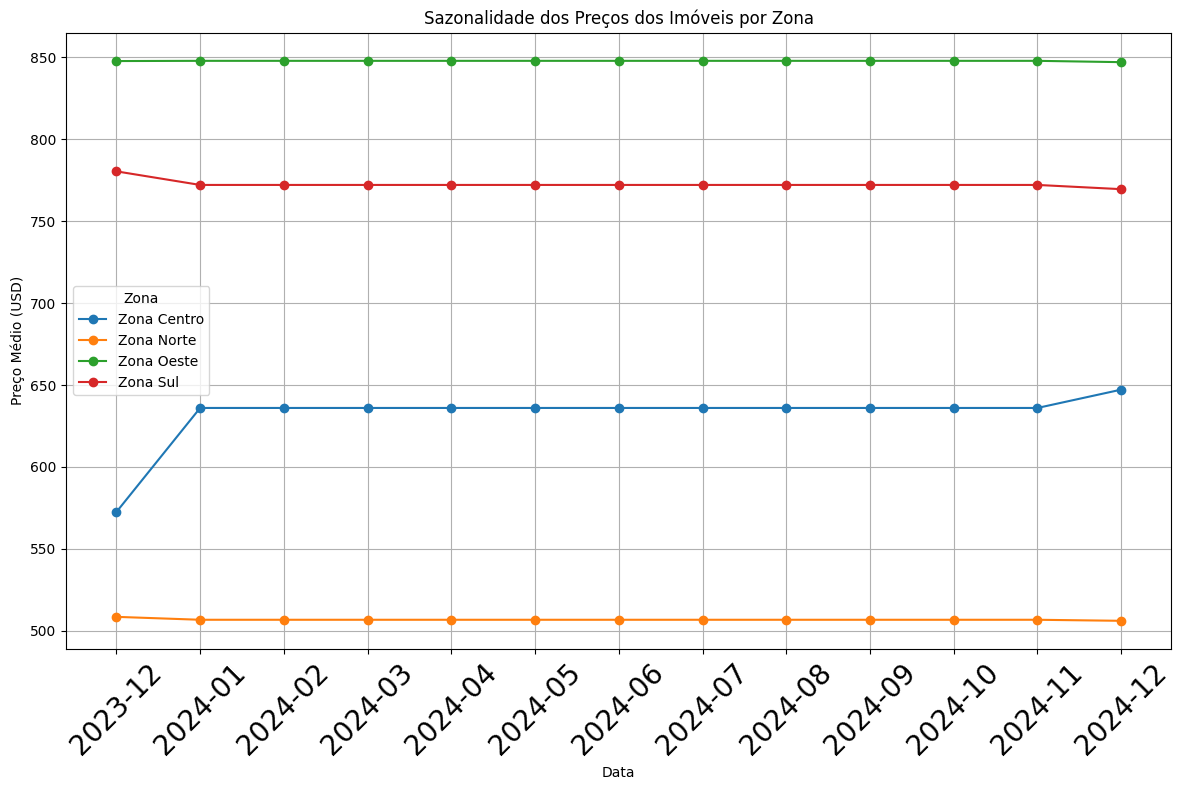

In [ ]:
df_calendar['price'] = df_calendar['price'].apply(price_to_float)
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['month'] = df_calendar['date'].dt.to_period('M')
monthly_prices = df_calendar.groupby(['zone', 'month'])['price'].mean().reset_index()

zones = monthly_prices['zone'].unique()
plt.figure(figsize=(12, 8))

for zone in zones:
    zone_data = monthly_prices[monthly_prices['zone'] == zone]
    plt.plot(zone_data['month'].astype(str), zone_data['price'], marker='o', label=f'{zone}')

plt.title('Sazonalidade dos Preços dos Imóveis por Zona')
plt.xlabel('Data')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=45)
plt.legend(title='Zona')
plt.grid(True)
plt.tight_layout()

plt.show()

### Conclusão Q3

Os preços em média dos imóveis não exibem uma clara sazonalidade, existe uma constância nos preços médio durante os meses e uma diferença clara entre as zonas da cidade. Era esperado em uma cidade turística como o Rio de Janeiro, onde há eventos e temporadas turísticas, uma flutuação maior.

## **Q4. Pergunta 4.** Qual a disponibilidade dos imóveis ao longo do ano no Airbnb no Rio de Janeiro?

In [ ]:
df_grouped_available = df_calendar.drop_duplicates(["listing_id", "month"]).groupby(["month", "available"]).count()

In [ ]:
df_grouped_available = df_grouped_available[["listing_id"]]
df_grouped_available.head()

listing_id
month   available            
2023-12 f               28158
        t                7850
2024-01 f               25572
        t               10436
2024-02 f               13684

In [ ]:
df_available = df_grouped_available.reset_index()

In [ ]:
hosts_available = df_available[df_available.available == 't']["listing_id"].reset_index()
hosts_unavailable = df_available[df_available.available == 'f']["listing_id"].reset_index()

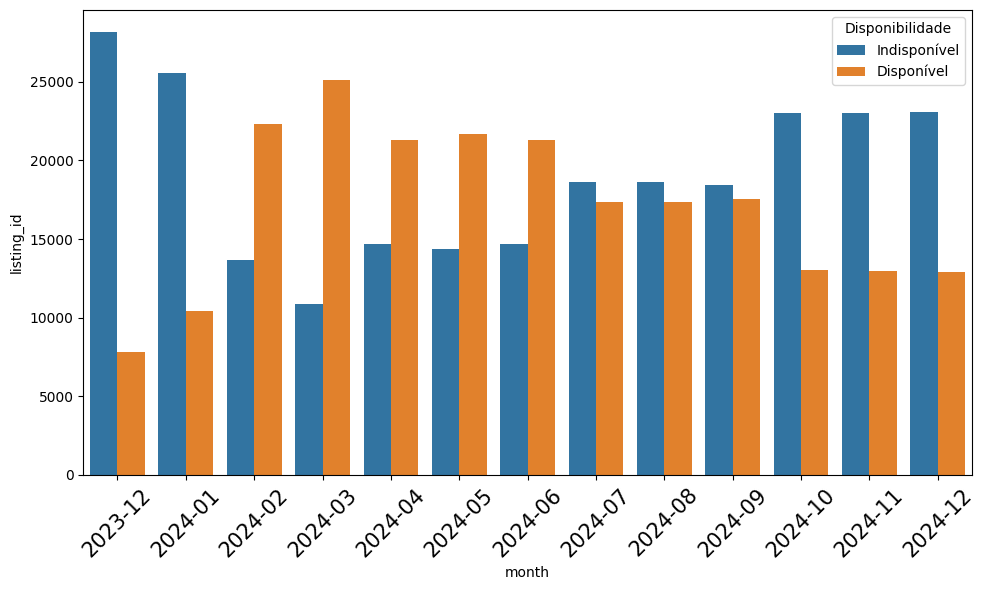

In [ ]:
df_available['available_or_not'] = df_available['available'].map({'t': 'Disponível', 'f': 'Indisponível'})

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='listing_id', hue='available_or_not', data=df_available)

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Disponibilidade')
plt.show()

Correlação

                   price  minimum_nights  maximum_nights
price           1.000000        0.020470       -0.023532
minimum_nights  0.020470        1.000000        0.019378
maximum_nights -0.023532        0.019378        1.000000


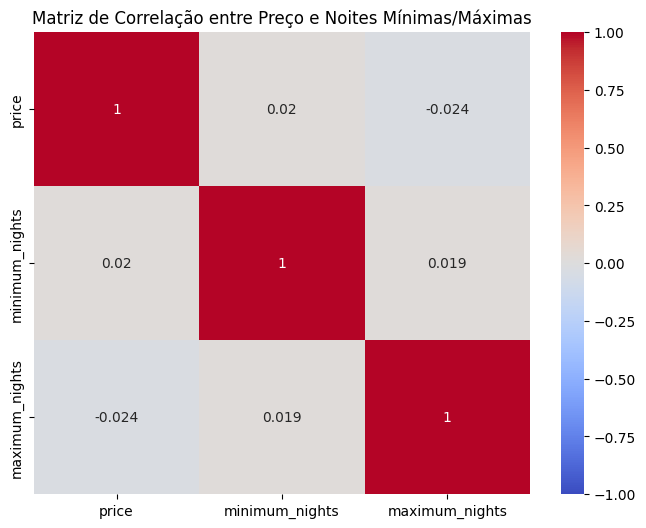

In [ ]:
df_corr = df_calendar[['price', 'minimum_nights', 'maximum_nights']]

correlation_matrix = df_corr.corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Preço e Noites Mínimas/Máximas')
plt.show()

### Conclusão Q4

A análise da disponibilidade dos imóveis durante os meses demonstra uma clara variação entre alguns períodos do ano. No início e fim é observado maiores números de reservas enquanto uma baixa temporada no segundo bimestre. Esse era o resultado esperado, pois segue em linha as férias escolares de verão (dez-jan) e inverno (jul). Além disso há uma correlação com as estações do ano, com mais reservas no verão e primavera, já que é uma cidade litorânea e turistas buscam dias ensolarados.

## **Q5. Pergunta 5.** Quais são as características dos superhosts em comparação com outros hosts?

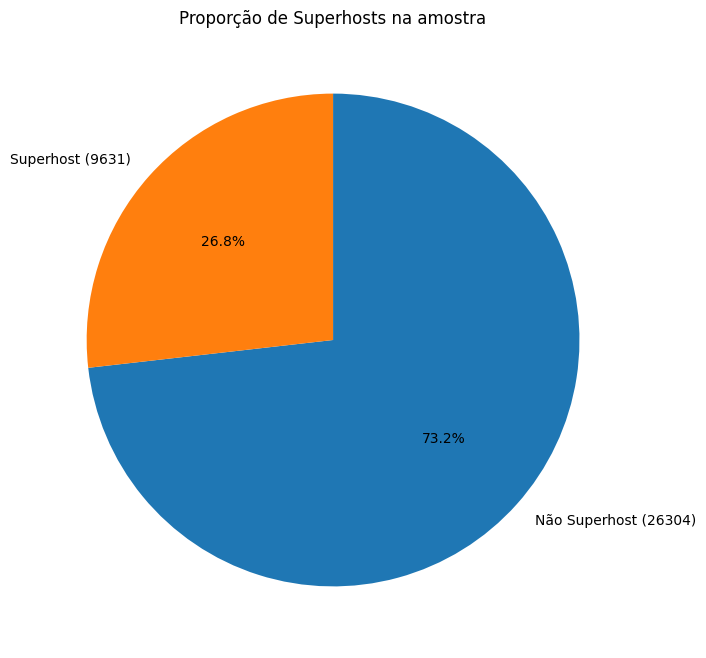

In [ ]:
# Quantidade de imóveis superhosts
count_by_superhost = df_listings.groupby("host_is_superhost").count().id

# Plotando o gráfico de pizza da quantidade de superhosts
labels = [f'Não Superhost ({count_by_superhost["f"]})', f'Superhost ({count_by_superhost["t"]})']
plt.figure(figsize=(8, 8))
count_by_superhost.plot.pie(labels = labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proporção de Superhosts na amostra')
plt.ylabel('')
plt.show()

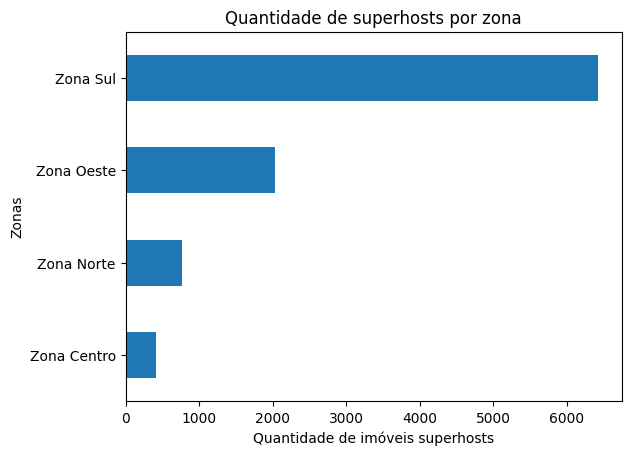

In [ ]:
# Quantidade de imóveis de superhost por zona
only_superhosts = df_listings[df_listings.host_is_superhost == "t"]
superhost_by_zone = only_superhosts.groupby("zone").count().id

# Plotando gráfico horizontal da quantidade de imóveis superhosts por zona da cidade do Rio de Janeiro
superhost_by_zone.plot(kind='barh')
plt.ylabel('Zonas')
plt.xlabel('Quantidade de imóveis superhosts')
plt.title("Quantidade de superhosts por zona")
plt.show()

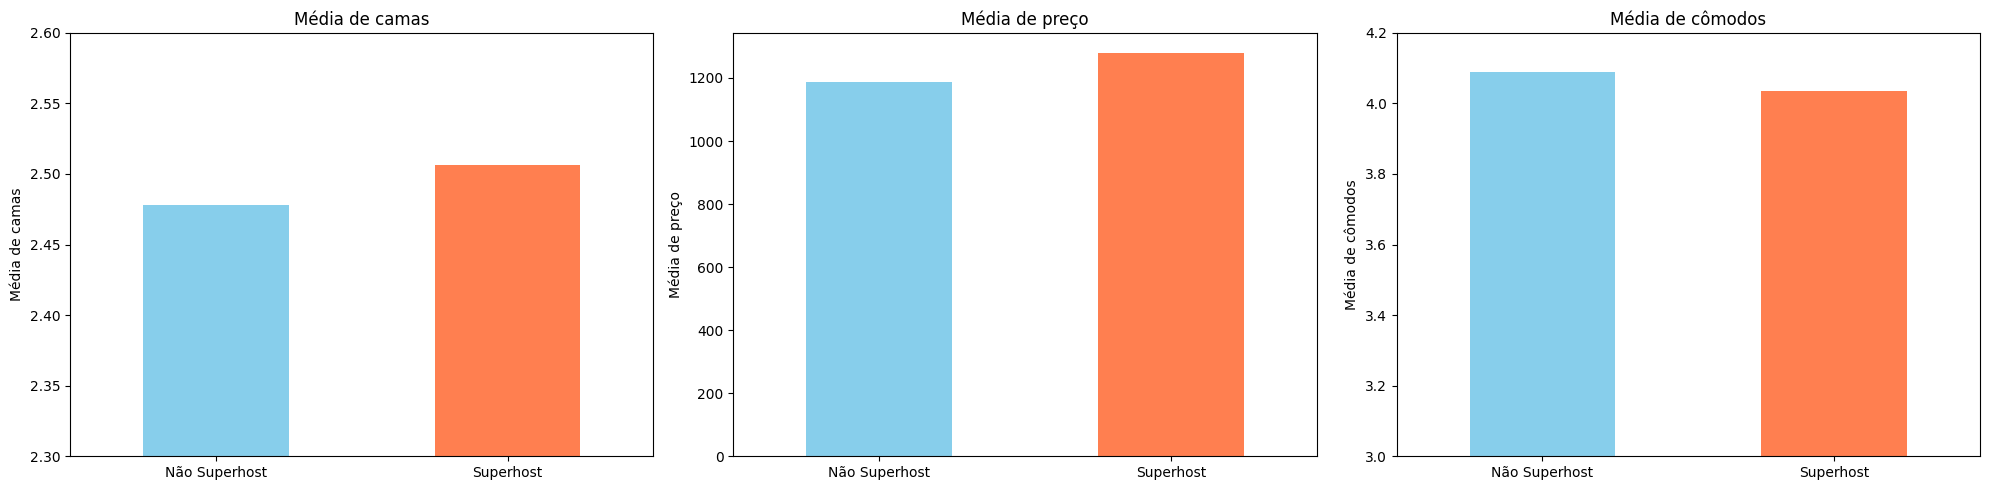

In [ ]:
# Características arbitrárias consideradas a fim de encontrar relação (camas, preço e cômodos)
mean_superhosts = df_listings.groupby("host_is_superhost")[["beds", "price", "accommodates"]].mean()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plotando gráfico de média de camas em host e superhost
mean_superhosts['beds'].plot(kind='bar', color=['skyblue', 'coral'], ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Média de camas')
axes[0].set_title('Média de camas')
axes[0].set_xticks([0, 1])
axes[0].set_ylim(2.3, 2.6)
axes[0].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)

# Plotando gráfico de média de preços em host e superhost
mean_superhosts['price'].plot(kind='bar', color=['skyblue', 'coral'], ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Média de preço')
axes[1].set_title('Média de preço')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)

# Plotando gráfico de média de cômodos do imóvel em host e superhost
mean_superhosts['accommodates'].plot(kind='bar', color=['skyblue', 'coral'], ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('Média de cômodos')
axes[2].set_title('Média de cômodos')
axes[2].set_xticks([0, 1])
axes[2].set_ylim(3, 4.2)
axes[2].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)

plt.tight_layout()
plt.show()

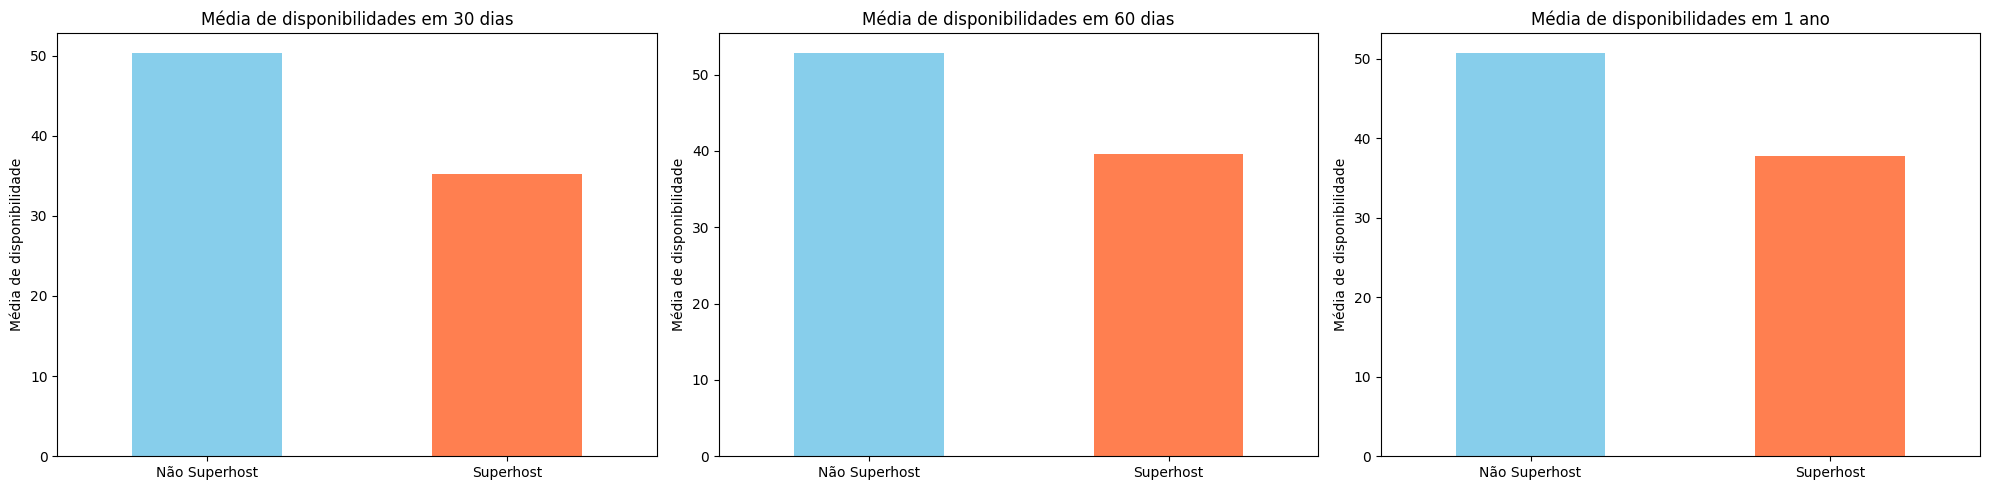

In [ ]:
# Disponibilidade dos superhosts e hosts em recortes de 1 mês, 2 meses e 1 ano
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Criando colunas que calculam a proporção de disponibilidade em relação ao tempo relatado
df_listings["available_30_proportion"] = 100 * df_listings.availability_30 / 30
df_listings["available_60_proportion"] = 100 * df_listings.availability_60 / 60
df_listings["available_365_proportion"] = 100 * df_listings.availability_365 / 365

# Plotando a média de disponibilidade em 30 dias
mean_superhosts_available = df_listings.groupby("host_is_superhost")[["available_30_proportion","available_60_proportion", "available_365_proportion"]].mean()
mean_superhosts_available['available_30_proportion'].plot(kind='bar', color=['skyblue', 'coral'], ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Média de disponibilidade')
axes[0].set_title('Média de disponibilidades em 30 dias')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)

# Plotando a média de disponibilidade em 60 dias
mean_superhosts_available['available_60_proportion'].plot(kind='bar', color=['skyblue', 'coral'], ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Média de disponibilidade')
axes[1].set_title('Média de disponibilidades em 60 dias')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)

# Plotando a média de disponibilidade em 1 ano
mean_superhosts_available['available_365_proportion'].plot(kind='bar', color=['skyblue', 'coral'], ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('Média de disponibilidade')
axes[2].set_title('Média de disponibilidades em 1 ano')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)

plt.tight_layout()
plt.show()

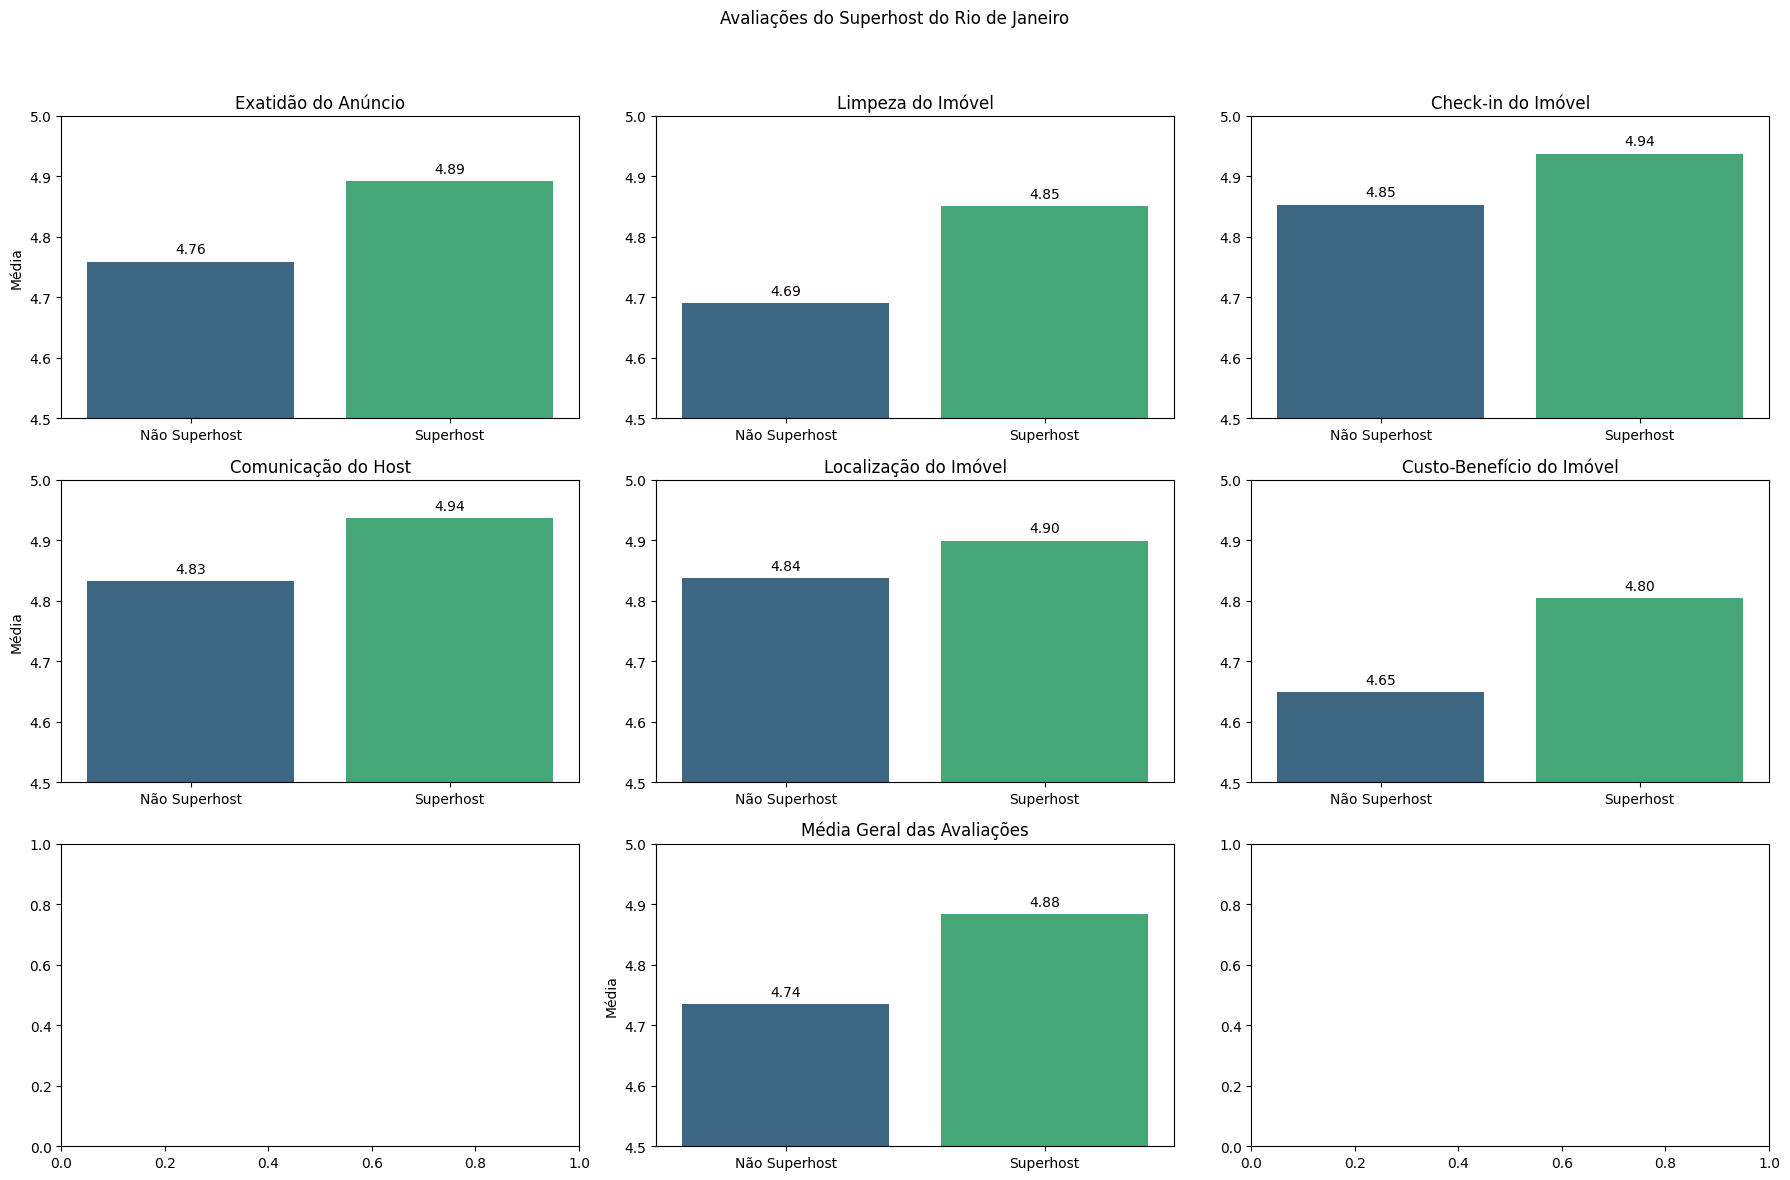

In [ ]:
# Fazer análise pelos reviews

# Avaliação da exatidão do anúncio de superhosts da cidade do Rio de Janeiro
df_score_superhost_accuracy = calculate_score_superhost("review_scores_accuracy")

# Avaliação da limpeza do imóvel por zona
df_score_superhost_cleanliness = calculate_score_superhost("review_scores_cleanliness")

# Avaliação do check-in do imóvel por zona
df_score_superhost_checkin = calculate_score_superhost("review_scores_checkin")

# Avaliação da comunicação do host do imóvel por zona
df_score_superhost_communication = calculate_score_superhost("review_scores_communication")

# Avaliação da localização do imóvel por zona
df_score_superhost_location = calculate_score_superhost("review_scores_location")

# Avaliação do custo-benefício do imóvel por zona
df_score_superhost_scores_values = calculate_score_superhost("review_scores_value")

# Média geral por zona, calculada pelo AirBnB em relação com os parâmetros avaliados e seus respectivos pesos
df_score_superhost_general_score = calculate_score_superhost("review_scores_rating")

# Função para adicionar rótulos de valores às barras
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Plotando os gráficos
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Avaliações do Superhost do Rio de Janeiro')

sns.barplot(data=df_score_superhost_accuracy, x='host_is_superhost', y='review_scores_accuracy', ax=ax[0, 0], hue='host_is_superhost', palette='viridis', dodge=False)
ax[0, 0].set_title('Exatidão do Anúncio')
ax[0, 0].set_xticks([0, 1])
ax[0, 0].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)
ax[0, 0].set_ylabel('Média')
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylim(4.5, 5)
add_value_labels(ax[0, 0])

sns.barplot(data=df_score_superhost_cleanliness, x='host_is_superhost', y='review_scores_cleanliness', ax=ax[0, 1], hue='host_is_superhost', palette='viridis', dodge=False)
ax[0, 1].set_title('Limpeza do Imóvel')
ax[0, 1].set_xlabel('')
ax[0, 1].set_xticks([0, 1])
ax[0, 1].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)
ax[0, 1].set_ylabel('')
ax[0, 1].set_ylim(4.5, 5)
add_value_labels(ax[0, 1])

sns.barplot(data=df_score_superhost_checkin, x='host_is_superhost', y='review_scores_checkin', ax=ax[0, 2], hue='host_is_superhost', palette='viridis', dodge=False)
ax[0, 2].set_title('Check-in do Imóvel')
ax[0, 2].set_xlabel('')
ax[0, 2].set_xticks([0, 1])
ax[0, 2].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)
ax[0, 2].set_ylabel('')
ax[0, 2].set_ylim(4.5, 5)
add_value_labels(ax[0, 2])

sns.barplot(data=df_score_superhost_communication, x='host_is_superhost', y='review_scores_communication', ax=ax[1, 0], hue='host_is_superhost', palette='viridis', dodge=False)
ax[1, 0].set_title('Comunicação do Host')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Média')
ax[1, 0].set_xticks([0, 1])
ax[1, 0].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)
ax[1, 0].set_ylim(4.5, 5)
add_value_labels(ax[1, 0])

sns.barplot(data=df_score_superhost_location, x='host_is_superhost', y='review_scores_location', ax=ax[1, 1], hue='host_is_superhost', palette='viridis', dodge=False)
ax[1, 1].set_title('Localização do Imóvel')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')
ax[1, 1].set_xticks([0, 1])
ax[1, 1].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)
ax[1, 1].set_ylim(4.5, 5)
add_value_labels(ax[1, 1])

sns.barplot(data=df_score_superhost_scores_values, x='host_is_superhost', y='review_scores_value', ax=ax[1, 2], hue='host_is_superhost', palette='viridis', dodge=False)
ax[1, 2].set_title('Custo-Benefício do Imóvel')
ax[1, 2].set_xlabel('')
ax[1, 2].set_ylabel('')
ax[1, 2].set_xticks([0, 1])
ax[1, 2].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)
ax[1, 2].set_ylim(4.5, 5)
add_value_labels(ax[1, 2])

sns.barplot(data=df_score_superhost_general_score, x='host_is_superhost', y='review_scores_rating', ax=ax[2, 1], hue='host_is_superhost', palette='viridis', dodge=False)
ax[2, 1].set_title('Média Geral das Avaliações')
ax[2, 1].set_xlabel('')
ax[2, 1].set_ylabel('Média')
ax[2, 1].set_xticks([0, 1])
ax[2, 1].set_xticklabels(['Não Superhost', 'Superhost'], rotation=0)
ax[2, 1].set_ylim(4.5, 5)
add_value_labels(ax[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Conclusão Q5

É evidente que a quantidade de superhosts seja inferior a anúncios normais. Entretanto, é possível dizer que a localização predominante de imóveis superhosts sejam em lugares mais seguros, dado que existem mais de seis mil anúncios de superhosts na Zona Sul da cidade do Rio de Janeiro, esta região que apresentou anteriormente na análise (Questão 2) uma avaliação bem superior em relação à localização e exatidão do anúncio comparando com as demais zonas da cidade.

Também foi possível afirmar que o preço entre anúncio de hosts e superhosts não possuem tanta discrepância quando comparada com a média das diárias.

Sob a ótica da disponibilidade do anúncio, os anúncios de superhosts tanto a curto prazo (30 dias) quanto a longo prazo (1 ano) possuem uma disponibilidade bem escassa em comparação com anúncios normais. Esta que pode ser explicada por um imóvel bem localizado (Zona Sul) e também por feedbacks cedidos por clintes dos imóveis, destacando que a exatidão do anúncio, limpeza e comunicação com host superiores em superhosts, apontando transparência e segurança do imóvel.

# **Referências**


Dados do AirBnB:
 - https://insideairbnb.com/get-the-data/

Ferramentas para analise e gráficos:
 - https://pandas.pydata.org/docs/
 - https://matplotlib.org/stable/plot_types/index
 - https://seaborn-qqplot.readthedocs.io/en/latest/


# **Conclusão**

A análise exploratória de dados (EDA) realizada sobre os imóveis do Airbnb no Rio de Janeiro revelou insights valiosos sobre a dinâmica do mercado e as características dos anfitriões. Superhosts, por exemplo, destacam-se por receberem avaliações mais altas em diversas categorias, como exatidão do anúncio, limpeza e comunicação. A localização dos imóveis também se mostrou um fator crucial para a satisfação dos hóspedes, com certas áreas da cidade recebendo avaliações consistentemente mais altas. Além disso, observou-se uma clara sazonalidade na disponibilidade dos imóveis, refletindo a influência de eventos, temporadas turísticas e estações do ano na demanda.
Entretanto, a análise enfrentou algumas limitações. Os dados disponíveis podem não capturar todas as variáveis relevantes, como eventos específicos que impactam a demanda e os preços, e algumas categorias possuem valores ausentes, o que pode afetar a precisão das conclusões.



# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

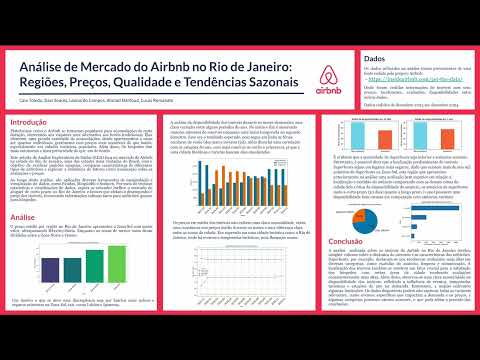

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('_J6fSFcAhDU') # substitua pelo seu vídeo

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 1 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 10 #@param {type:"slider", min:0, max:10, step:1}
Video = 10 #@param {type:"slider", min:0, max:10, step:1}

In [2]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

# nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

NameError: name 'Completo' is not defined